<div class="alert alert-block alert-success">

#  BA Carriers Ratings In CentralDispatch
    
</div>

In [182]:
import pandas as pd
import seaborn as  sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [183]:
df = pd.read_excel("Book1.xlsx","all_ratings").rename(columns = {'DATE': 'Date'})

In [184]:
df["Date"]= pd.to_datetime(df["Date"],dayfirst =True)
df['Month'] = df.Date.astype('datetime64[M]')
df['Month_n'] = df.Date.dt.month
df['Positive'] = df.Status.apply(lambda x : 1 if x == 'Positive'  else 0)
df['Negative'] = df.Status.apply(lambda x : 1 if x == 'Negative'  else 0)

In [185]:
df_status_count = df.Status.value_counts().to_frame().reset_index()

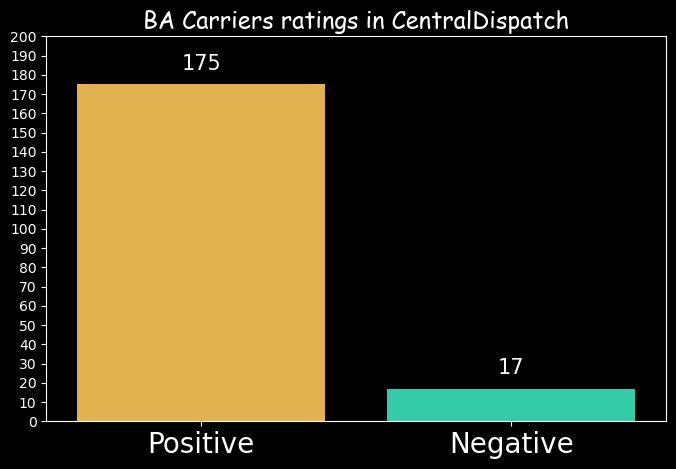

In [186]:
plt.figure(figsize=(8,5))
color = ['navy','darkred']
plots = sns.barplot(x = df_status_count["index"], y = df_status_count["Status"],palette="turbo_r")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 15, xytext=(0, 15),color = "snow",
                   textcoords='offset points')
    
plt.tick_params(axis='x', rotation=90)
plt.title("BA Carriers ratings in CentralDispatch",fontdict={'fontsize': 17,'fontname' :'Comic Sans MS'})

plt.yticks(np.arange(0,201,10))
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation = 0,size = 20);

#  მიღებული რეიტინგების რაოდენობა  თვის ჭრილში

In [187]:
df_month = df.groupby("Month",as_index=False)\
        .agg({"Positive":"sum","Negative":"sum"})\
        .reset_index(drop=True)

df_month["Total"] = df_month['Positive'] + df_month['Negative']
df_month.append(df_month.sum(numeric_only= True).rename("Total"))

,Month,Positive,Negative,Total
0,2023-02-01,5.0,0.0,5.0
1,2023-03-01,36.0,0.0,36.0
2,2023-04-01,13.0,1.0,14.0
3,2023-05-01,20.0,0.0,20.0
4,2023-06-01,23.0,1.0,24.0
5,2023-07-01,41.0,8.0,49.0
6,2023-08-01,37.0,7.0,44.0
Total,NaT,175.0,17.0,192.0


In [188]:
df_month = df_month[["Month","Positive","Negative"]]

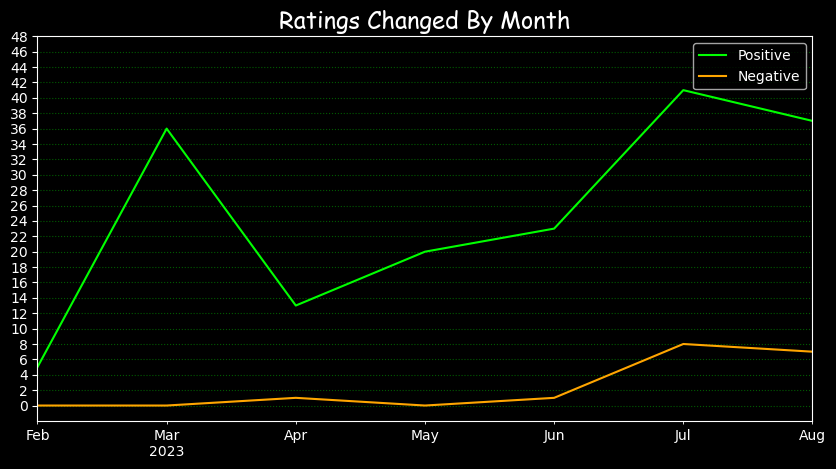

In [189]:
df_month.plot(kind = 'line',x = 'Month',color = ["lime","orange"],figsize=(10,5))
plt.title("Ratings Changed By Month",fontdict={'fontsize': 17, 'fontname':'Comic Sans MS'})
plt.grid(linestyle= ":",alpha = 0.7,color = 'g')
plt.xlabel(None)
plt.xticks(size = 15)
plt.yticks(np.arange(0,50,2));

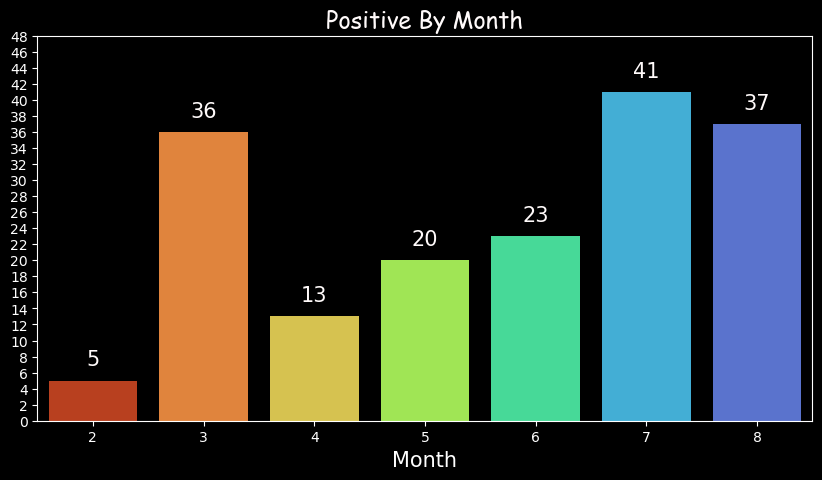

In [190]:
df_month_p = df.groupby('Month_n',as_index=False).agg({"Positive":"sum","Negative":"sum"})
plt.figure(figsize=(10,5))
plots = sns.barplot(x='Month_n', y='Positive',data = df_month_p, palette='turbo_r' )


plt.title("Positive By Month",
          fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS', "color": "snow"}) 

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 15, xytext=(0, 15),color = "snow",
                   textcoords='offset points')
plt.ylabel(None)    
plt.yticks(np.arange(0,50,2))
plt.xlabel("Month",size = 15)
plt.show()

# მიღებული რეიტინგების რაოდენობა კვირის ჭრილში

In [191]:
df_week = df.groupby(pd.Grouper(key="Date",freq = "W"))\
        .agg({"Positive":"sum","Negative":"sum"}).reset_index()


df_week.query('Date >= "2023-06-01"')

,Date,Positive,Negative
15,2023-06-04,8,0
16,2023-06-11,6,0
17,2023-06-18,4,0
18,2023-06-25,4,0
19,2023-07-02,7,1
20,2023-07-09,4,1
21,2023-07-16,8,2
22,2023-07-23,14,5
23,2023-07-30,12,0
24,2023-08-06,3,0


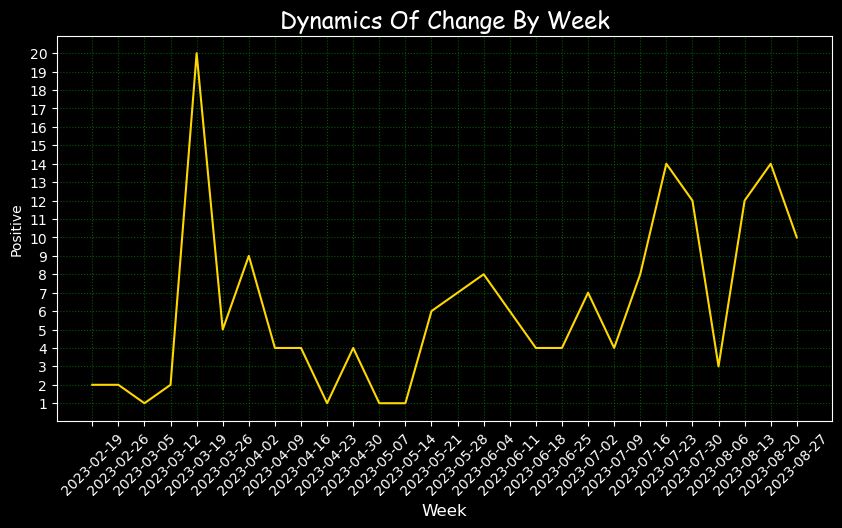

In [192]:
plt.figure(figsize=(10, 5))
sns.lineplot(x ='Date', y ='Positive',data = df_week , color = "gold")
plt.xticks(rotation = 45)
plt.xticks(df_week.Date)
plt.title("Dynamics Of Change By Week",fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS'}) 
plt.xlabel(None)
plt.grid(linestyle= ":", alpha = 0.7, color = 'g')
plt.yticks(np.arange(1,21))
plt.xlabel("Week",size = 12);

In [193]:
df_week['week_n'] = df_week.Date.dt.isocalendar().week

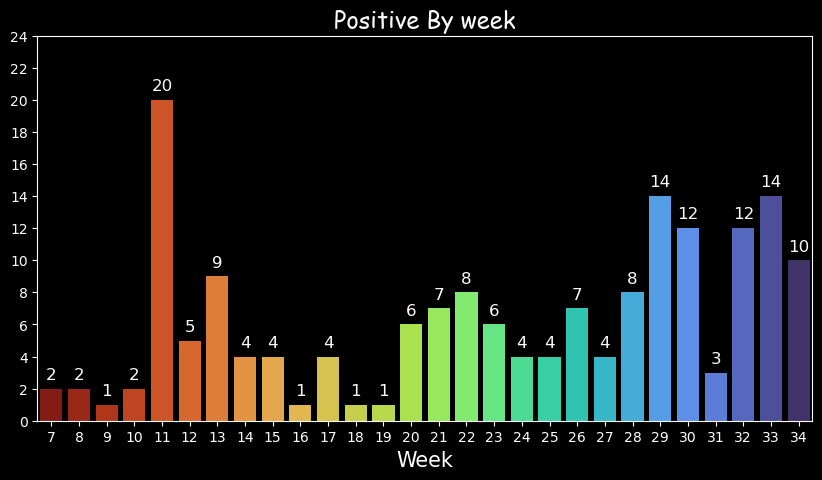

In [194]:
plt.figure(figsize=(10,5))
plots = sns.barplot(x='week_n', y='Positive',data = df_week, palette='turbo_r' )


plt.title("Positive By week",
          fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS', "color": "snow"}) 

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 12, xytext=(0, 10),color = "snow",
                   textcoords='offset points')
plt.ylabel(None)    
plt.yticks(np.arange(0,25,2))
plt.xlabel("Week",size = 15)
plt.show()

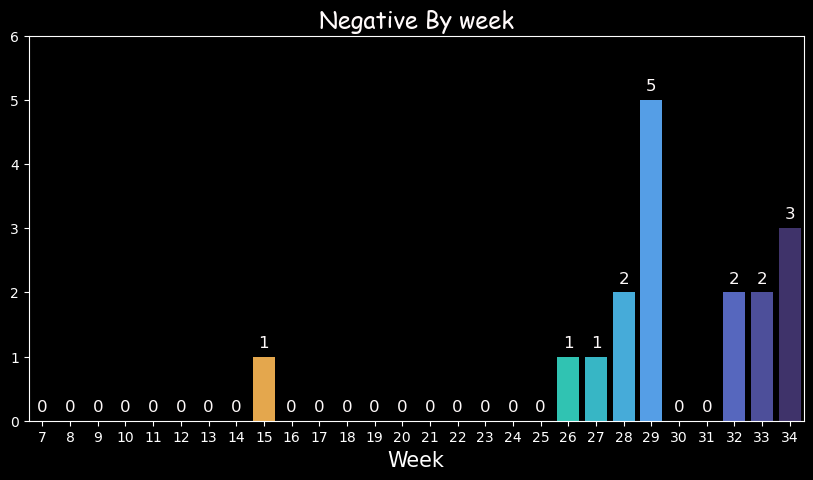

In [195]:
plt.figure(figsize=(10,5))
plots = sns.barplot(x='week_n', y='Negative',data = df_week, palette='turbo_r' )


plt.title("Negative By week",
          fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS', "color": "snow"}) 

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 12, xytext=(0, 10),color = "snow",
                   textcoords='offset points')
plt.ylabel(None)    
plt.yticks(np.arange(0,7))
plt.xlabel("Week",size = 15)
plt.show()

#  კომპანიების მიხედვით

*რამდენიმე კომპანია განსაკუთრებით აქტიურია პოზიტივებსაც წერს და ნეგატივიც აქვს*

In [196]:
df_company = df.groupby("Company")\
    .agg({"Positive":"sum","Negative":"sum"})\
    .sort_values("Positive",ascending=False)\
    .reset_index()

df_company.head(20)

,Company,Positive,Negative
0,Marvel Auto Transport LLC,5,1
1,United Freeway Transportation LLC,3,0
2,MOVEAUTO,3,0
3,Xpress Auto Logistics Inc,3,0
4,WhipFlip Inc,3,1
5,"Mercury Auto Transport, Inc.1",3,1
6,Infinite Routes Auto,2,0
7,BROADWAY AUTO TRANSPORT LLC,2,0
8,Newman Industries,2,0
9,Dynamic Auto Movers LLC,2,0


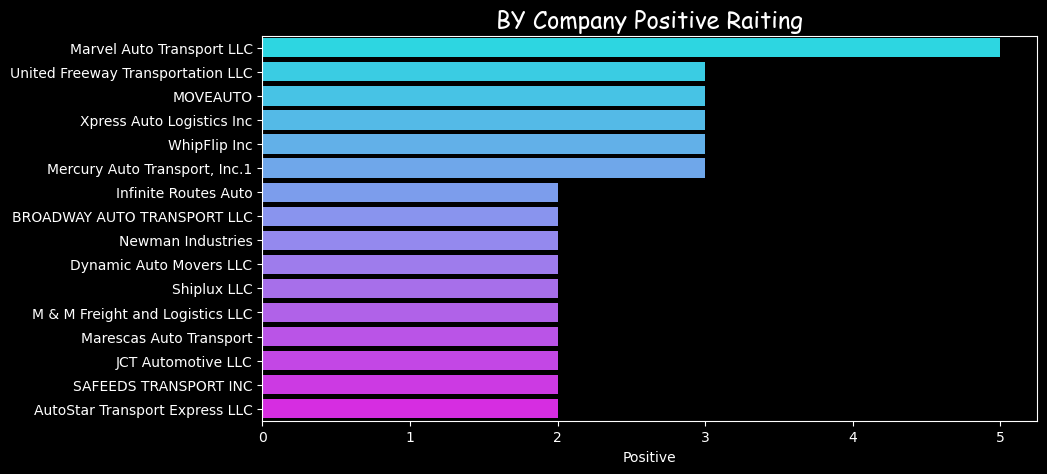

In [197]:
plt.figure(figsize=(10, 5))
sns.barplot(data = df_company.head(16),y = 'Company', x = 'Positive', palette='cool',orient ='h')
plt.title("BY Company Positive Raiting",fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS'}) 
plt.ylabel(None);

# თვის/კვირის საშუალო მაჩვენებელი

In [198]:
Av_m = df_month.query('Month >= "2023-03-01"')["Positive"].mean()
print("საშუალოდ მიღებული პოზიტივი თვის ჭრილში :", round(Av_m,1))

საშუალოდ მიღებული პოზიტივი თვის ჭრილში : 28.3


In [199]:
Av_m = df_week.query('Date >= "2023-03-01"')["Positive"].mean()
print("საშუალოდ მიღებული პოზიტივი კვირის ჭრილში :", round(Av_m,1))

საშუალოდ მიღებული პოზიტივი კვირის ჭრილში : 6.6


In [200]:
Av_n = df_month.query('Month >= "2023-03-01"')["Negative"].mean()
print("საშუალოდ მიღებული ნეგატივი თვის ჭრილში :", round(Av_n,1))

საშუალოდ მიღებული ნეგატივი თვის ჭრილში : 2.8


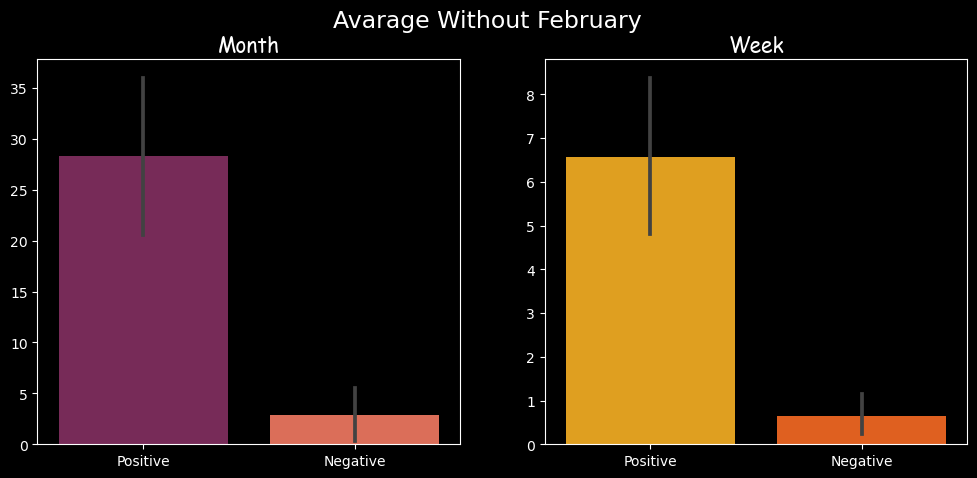

In [201]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

fig.suptitle("Avarage Without February", size = 17)

sns.barplot(ax=axes[0], data = df_month.query('Month >= "2023-03-01"'), palette='rocket')
axes[0].set_title("Month",fontdict={'fontsize': 15, 'fontname' : 'Comic Sans MS'})

sns.barplot(data = df_week[["Date","Positive","Negative"]].query('Date >="2023-03-01"'),palette='autumn_r')
plt.title("Week", fontdict={'fontsize': 15, 'fontname' : 'Comic Sans MS'})

plt.show()